# Imports

In [1]:
# imports
from sklearn import metrics
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Split data with constant randomizer

In [2]:
#code 
test_size = 0.25
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=test_size, random_state=42)



# KNN

In [3]:
def knn(n, plot=False):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    predict = neigh.predict(X_test)
    accuracy = round(neigh.score(X_test, y_test), 3)
    recall = round(metrics.recall_score(y_test, predict, average="micro"), 3)
    if plot:
        return accuracy
    return f'Accuracy: {accuracy}\t Recall: {recall}', confusion_matrix(y_test, predict)


# SGD

In [4]:
def SGD():
    sgd = SGDClassifier()
    sgd.fit(X_train, y_train)
    predict = sgd.predict(X_test)
    accuracy = round(sgd.score(X_test, y_test), 3)
    recall = round(metrics.recall_score(y_test, predict, average="micro"), 3)
    return f'Accuracy: {accuracy}\t Recall: {recall}'

# Decision Tree

In [5]:
def DT():
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    predict = dt.predict(X_test)
    accuracy = round(dt.score(X_test, y_test), 3)
    recall = round(metrics.recall_score(y_test, predict, average="micro"), 3)
    return f'Accuracy: {accuracy}\t Recall: {recall}'

# Plot for KNN
## Plotting accuracy with different values of N in KNN

In [6]:
def plot():
    x = []
    y = []
    for i in range(1, 20, 2):
        knn_result = knn(i, plot=True)
        x.append(i)
        y.append(knn_result)
    plt.plot(x, y, '-gD', markevery=True)
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.show()

In [7]:
print('COMP9517 Week 5 Lab - z5240221\n')
print(f'Test size = {test_size}')
knn_result, confusion_mat = knn(n=5)
print(f'KNN {knn_result}')
print(f'SGD {SGD()}')
print(f'DT {DT()}')
print(f'\nKNN Confusion Matrix: \n{confusion_mat}')


COMP9517 Week 5 Lab - z5240221

Test size = 0.25
KNN Accuracy: 0.993	 Recall: 0.993
SGD Accuracy: 0.964	 Recall: 0.964
DT Accuracy: 0.873	 Recall: 0.873

KNN Confusion Matrix: 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  1  1  0  0  0 46]]


## Calling plotting function to justify N in KNN, hence selected k = 5

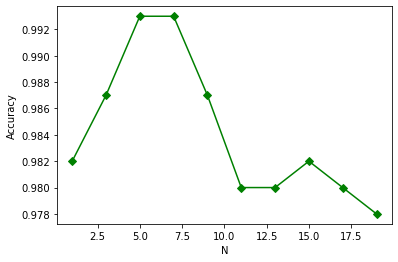

In [8]:
plot()